# Day 11

- All of the panels are currently black.
- provide 0 if the robot is over a black panel or 1 if the robot is over a white panel. Then, the program will output two values:
    - First, it will output a value indicating the color to paint the panel the robot is over: 0 means to paint the panel black, and 1 means to paint the panel white.
    - Second, it will output a value indicating the direction the robot should turn: 0 means it should turn left 90 degrees, and 1 means it should turn right 90 degrees.

In [76]:
main_program = '3,8,1005,8,310,1106,0,11,0,0,0,104,1,104,0,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,0,10,4,10,1001,8,0,29,1,2,11,10,1,1101,2,10,2,1008,18,10,2,106,3,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,67,2,105,15,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,0,10,4,10,1001,8,0,93,2,1001,16,10,3,8,102,-1,8,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,119,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,101,0,8,141,2,7,17,10,1,1103,16,10,3,8,1002,8,-1,10,101,1,10,10,4,10,108,0,8,10,4,10,102,1,8,170,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,1002,8,1,193,1,7,15,10,2,105,13,10,1006,0,92,1006,0,99,3,8,1002,8,-1,10,101,1,10,10,4,10,108,1,8,10,4,10,101,0,8,228,1,3,11,10,1006,0,14,1006,0,71,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,0,10,4,10,101,0,8,261,2,2,2,10,1006,0,4,3,8,102,-1,8,10,101,1,10,10,4,10,108,0,8,10,4,10,101,0,8,289,101,1,9,9,1007,9,1049,10,1005,10,15,99,109,632,104,0,104,1,21101,0,387240009756,1,21101,327,0,0,1105,1,431,21101,0,387239486208,1,21102,1,338,0,1106,0,431,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,21102,3224472579,1,1,21101,0,385,0,1106,0,431,21101,0,206253952003,1,21102,396,1,0,1105,1,431,3,10,104,0,104,0,3,10,104,0,104,0,21102,709052072296,1,1,21102,419,1,0,1105,1,431,21102,1,709051962212,1,21102,430,1,0,1106,0,431,99,109,2,21202,-1,1,1,21102,1,40,2,21102,462,1,3,21102,452,1,0,1105,1,495,109,-2,2105,1,0,0,1,0,0,1,109,2,3,10,204,-1,1001,457,458,473,4,0,1001,457,1,457,108,4,457,10,1006,10,489,1101,0,0,457,109,-2,2105,1,0,0,109,4,2102,1,-1,494,1207,-3,0,10,1006,10,512,21101,0,0,-3,22101,0,-3,1,21202,-2,1,2,21102,1,1,3,21101,531,0,0,1105,1,536,109,-4,2106,0,0,109,5,1207,-3,1,10,1006,10,559,2207,-4,-2,10,1006,10,559,21202,-4,1,-4,1105,1,627,22102,1,-4,1,21201,-3,-1,2,21202,-2,2,3,21102,1,578,0,1105,1,536,21202,1,1,-4,21102,1,1,-1,2207,-4,-2,10,1006,10,597,21101,0,0,-1,22202,-2,-1,-2,2107,0,-3,10,1006,10,619,21201,-1,0,1,21102,1,619,0,106,0,494,21202,-2,-1,-2,22201,-4,-2,-4,109,-5,2106,0,0'

In [77]:
from collections import defaultdict

In [78]:
from intcode_computer import Computer

In [79]:
my_in = [] # current_panel is white
my_out = []
comp = Computer('painter', main_program, input_queue=my_in, output_queue=my_out, extra_memory=1000, copy_program=True)
# comp.run_until_inputop_and_empty_input_queue_or_end_of_program()

- give input 
- get output
- paint tile (update dict)
- turn
- move forwards

In [80]:
pos = (0, 0)
iswhite_tile_map = defaultdict(lambda: 0)
orientations = ['u', 'r', 'd', 'l']

my_in.append(1) # current tile is black
print(my_in)

orientation_index = 0
continue_ = True
while continue_:
    ret_code = comp.run_until_inputop_and_empty_input_queue_or_end_of_program()
    if ret_code == -1:
        print(f'ret_code: {ret_code}')
        continue_ = False
    
    turn_right = my_out.pop()
    paint_white = my_out.pop()
#     paint_white, turn_right = my_out.pop()
    
    iswhite_tile_map[pos] = paint_white

    # update position
    if turn_right:
        orientation_index += 1
    else:
        orientation_index -= 1
    if orientation_index < 0:
        orientation_index += len(orientations)
    elif orientation_index == len(orientations):
        orientation_index -= len(orientations)

    if orientations[orientation_index] == 'u':
        pos = (pos[0], pos[1]+1)
    elif orientations[orientation_index] == 'r':
        pos = (pos[0]+1, pos[1])
    elif orientations[orientation_index] == 'd':
        pos = (pos[0], pos[1]-1)
    elif orientations[orientation_index] == 'l':
        pos = (pos[0]-1, pos[1])
    
    # update paint color    
    if ret_code != -1:
        my_in.append(iswhite_tile_map[pos])

print('len(iswhite_tile_map)', len(iswhite_tile_map))

[1]
end of program
ret_code: -1
len(iswhite_tile_map) 249


In [81]:
import numpy as np

In [94]:
arr = np.zeros((20, 50))
for (x, y), is_white in iswhite_tile_map.items():
    if is_white:
        arr[y, x] = 255
arr = np.roll(arr, shift=-1, axis=0)[::-1, ::]
n = 10
arr = np.kron(arr, np.ones((n,n)))

In [95]:
from PIL import Image

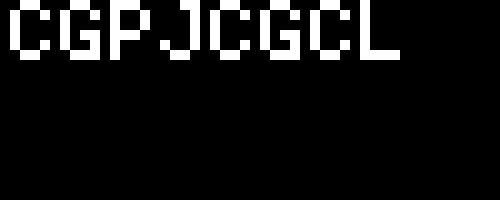

In [96]:
Image.fromarray(arr).convert('L')